In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('/content/pca_transformed_data_25.csv')

In [8]:
df_train, df_temp = train_test_split(df, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

In [9]:
print(f"Original dataframe size: {len(df)}")
print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Testing set size: {len(df_test)}")

Original dataframe size: 50000
Training set size: 35000
Validation set size: 7500
Testing set size: 7500


In [10]:
# Split into features and target
X_train = df_train.drop(columns=['Test Results'])
y_train = df_train['Test Results']

X_val = df_val.drop(columns=['Test Results'])
y_val = df_val['Test Results']

X_test = df_test.drop(columns=['Test Results'])
y_test = df_test['Test Results']

In [11]:
# Define the model
gnb = GaussianNB()

# Hyperparameter grid
param_grid = {
    'var_smoothing': np.logspace(-12, -6, 7)
}

In [12]:
# GridSearch with 5-fold CV
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06])},
             scoring='accuracy')

In [13]:
# Best model
best_gnb = grid_search.best_estimator_
print("Best var_smoothing:", grid_search.best_params_)

Best var_smoothing: {'var_smoothing': np.float64(1e-12)}


In [14]:
# Evaluate on validation set
val_preds = best_gnb.predict(X_val)
print("\nValidation Accuracy:", accuracy_score(y_val, val_preds))
print("\nValidation Classification Report:\n", classification_report(y_val, val_preds))


Validation Accuracy: 0.7452

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      2464
           1       0.68      0.71      0.70      2509
           2       0.79      0.76      0.77      2527

    accuracy                           0.75      7500
   macro avg       0.75      0.75      0.75      7500
weighted avg       0.75      0.75      0.75      7500



In [15]:
# Final test performance
test_preds = best_gnb.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, test_preds))
print("\nTest Classification Report:\n", classification_report(y_test, test_preds))


Test Accuracy: 0.7584

Test Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      2547
           1       0.69      0.71      0.70      2440
           2       0.80      0.78      0.79      2513

    accuracy                           0.76      7500
   macro avg       0.76      0.76      0.76      7500
weighted avg       0.76      0.76      0.76      7500



In [16]:
# The accuracy
accuracy = accuracy_score(y_test, test_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")
#

Accuracy: 75.84%


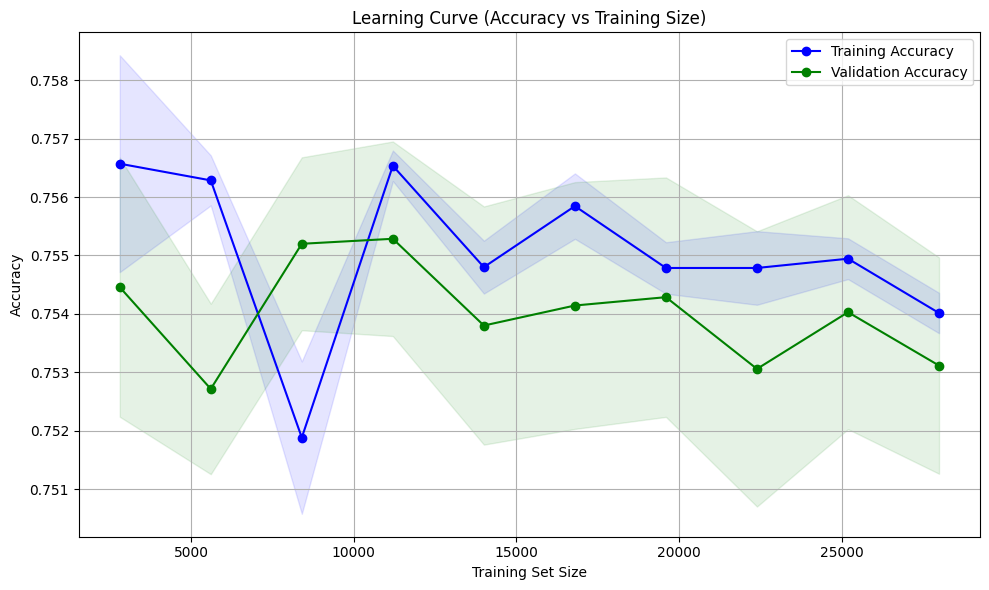

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    best_gnb, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='green')

plt.title('Learning Curve (Accuracy vs Training Size)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


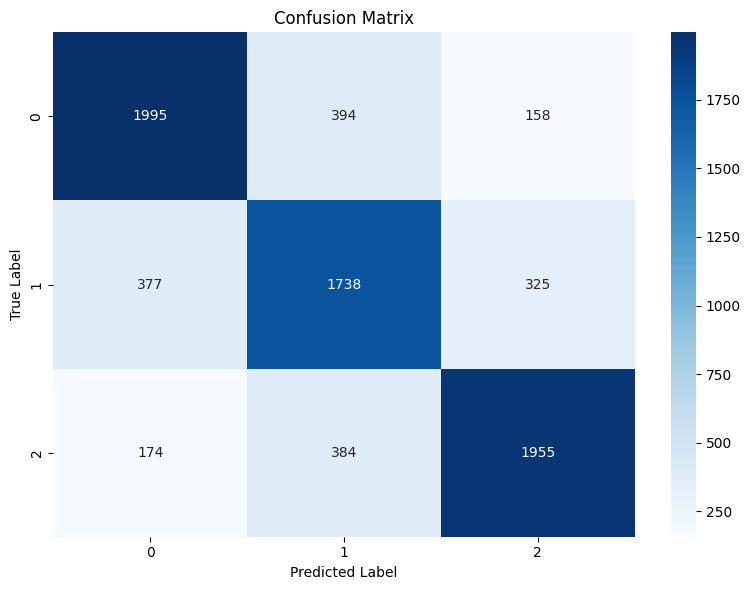

In [18]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_test = df_test['Test Results']
X_test = df_test.drop('Test Results', axis=1)
y_pred = best_gnb.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = best_gnb.classes_  # Get class labels from the model

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
